Data Cleaning

In [175]:
import pandas as pd
import dateutil
from datetime import datetime
df=read_csv(r'C:\Users\Gavin\Desktop\Prasanna.csv')
df['date']=pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%Y-%m')
df=df.groupby(['date']).sum()
df.to_csv(path_or_buf=r'C:\Users\Gavin\Desktop\Prasanna1.csv')

# Implementation of model training
Using deep learning framework and LSTM architecture

In [171]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataframe = read_csv(r'C:\Users\Gavin\Desktop\huishan1.csv', usecols=[1], engine='python')



dataframe=dataframe[cond1]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


C:\Users\Gavin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Epoch 1/100
 - 0s - loss: 0.7319 - acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.6151 - acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.5051 - acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.4020 - acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.3050 - acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2121 - acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.1365 - acc: 0.1111
Epoch 8/100
 - 0s - loss: 0.0793 - acc: 0.1111
Epoch 9/100
 - 0s - loss: 0.0389 - acc: 0.1111
Epoch 10/100
 - 0s - loss: 0.0172 - acc: 0.1111
Epoch 11/100
 - 0s - loss: 0.0094 - acc: 0.1111
Epoch 12/100
 - 0s - loss: 0.0069 - acc: 0.1111
Epoch 13/100
 - 0s - loss: 0.0069 - acc: 0.1111
Epoch 14/100
 - 0s - loss: 0.0070 - acc: 0.1111
Epoch 15/100
 - 0s - loss: 0.0071 - acc: 0.1111
Epoch 16/100
 - 0s - loss: 0.0069 - acc: 0.1111
Epoch 17/100
 - 0s - loss: 0.0069 - acc: 0.1111
Epoch 18/100
 - 0s - loss: 0.0068 - acc: 0.1111
Epoch 19/100
 - 0s - loss: 0.0068 - acc: 0.1111
Epoch 20/100
 - 0s - loss: 0.0069 - acc: 0.1111
Epoch 21/100
 - 0s - loss

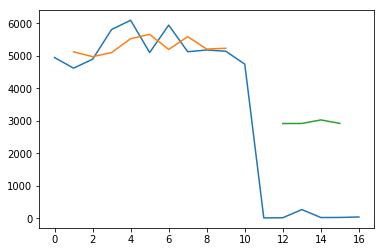

In [172]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

C:\Users\Gavin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Epoch 1/100
 - 1s - loss: 0.6548 - acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.5355 - acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.4254 - acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.3180 - acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2233 - acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.1413 - acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.0811 - acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.0407 - acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.0182 - acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.0128 - acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.0114 - acc: 0.0000e+00
Epoch 12/100
 - 0s - loss: 0.0114 - acc: 0.0000e+00
Epoch 13/100
 - 0s - loss: 0.0114 - acc: 0.0000e+00
Epoch 14/100
 - 0s - loss: 0.0116 - acc: 0.0000e+00
Epoch 15/100
 - 0s - loss: 0.0113 - acc: 0.0000e+00
Epoch 16/100
 - 0s - loss: 0.0115 - acc: 0.0000e+00
Epoch 17/100
 - 0s - loss: 0.0111 - acc: 0.0000e+00
Epoch 18/100
 - 0s - loss: 0.0112 - acc: 0.0000e+00
Epoch 19/100
 - 0s - loss: 0.0111 - acc: 0.0000e+00
Epoch 20/100
 - 0s - 

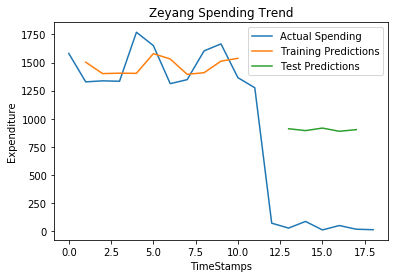

In [184]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataframe = read_csv(r'C:\Users\Gavin\Desktop\zeyang1.csv', usecols=[1], engine='python')

dataframe=dataframe[cond1]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.title('Zeyang Spending Trend')
plt.xlabel('TimeStamps')
plt.ylabel('Expenditure')
plt.plot(scaler.inverse_transform(dataset),label="Actual Spending")
plt.plot(trainPredictPlot,label="Training Predictions")
plt.plot(testPredictPlot,label="Test Predictions")
plt.legend()
plt.show()

C:\Users\Gavin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Epoch 1/100
 - 1s - loss: 0.7378 - acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.6887 - acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.6394 - acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.5919 - acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.5490 - acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.5011 - acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.4597 - acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.4158 - acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.3723 - acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.3323 - acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.2961 - acc: 0.0000e+00
Epoch 12/100
 - 0s - loss: 0.2567 - acc: 0.0000e+00
Epoch 13/100
 - 0s - loss: 0.2203 - acc: 0.0000e+00
Epoch 14/100
 - 0s - loss: 0.1890 - acc: 0.0000e+00
Epoch 15/100
 - 0s - loss: 0.1566 - acc: 0.0000e+00
Epoch 16/100
 - 0s - loss: 0.1297 - acc: 0.2500
Epoch 17/100
 - 0s - loss: 0.1096 - acc: 0.2500
Epoch 18/100
 - 0s - loss: 0.0839 - acc: 0.2500
Epoch 19/100
 - 0s - loss: 0.0722 - acc: 0.2500
Epoch 20/100
 - 0s - loss: 0.0564 - a

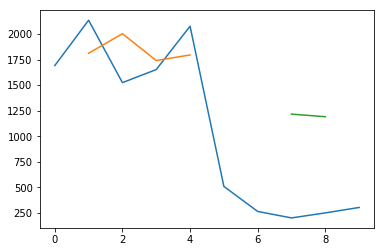

In [183]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataframe = read_csv(r'C:\Users\Gavin\Desktop\Prasanna1.csv', usecols=[1], engine='python')



dataframe=dataframe[cond1]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Actual Spending")
plt.plot(trainPredictPlot,label="Training Predictions")
plt.plot(testPredictPlot,label="Test Predictions")
plt.show()